In [22]:
import numpy as np
import pandas as pd

# 引入t检验相关函数
from scipy.stats import ttest_ind

# 引入Z检验相关函数
from statsmodels.stats.weightstats import ztest

# 引入绘图相关库
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## t检验

In [23]:
height_df = pd.read_csv("height.csv")
height_df

,身高,地区
0,165,A
1,167,A
2,172,A
3,176,A
4,178,A
5,180,A
6,182,A
7,183,A
8,185,A
9,188,A


In [24]:
region_a_height = height_df.query("地区 == 'A'")['身高']
region_b_height = height_df.query("地区 == 'B'")['身高']

In [25]:
region_a_height

0    165
1    167
2    172
3    176
4    178
5    180
6    182
7    183
8    185
9    188
Name: 身高, dtype: int64

In [26]:
region_b_height

10    155
11    158
12    160
13    162
14    165
15    168
16    172
17    176
18    179
19    182
Name: 身高, dtype: int64

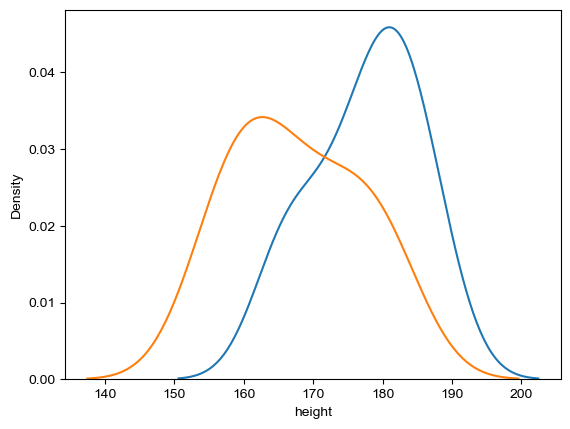

In [36]:
sns.kdeplot(region_a_height)
sns.kdeplot(region_b_height)
plt.xlabel('height')
plt.show()

In [38]:
# 进行t检验
t_stat, p_value = ttest_ind(region_a_height, region_b_height)
print(t_stat, p_value)

2.608375959216796 0.01778330596955697


In [39]:
# 显著水平为0.05（显著水平一般用alpha字母表示）
alpha = 0.05


# 比较计算出的p值和显著水平，打印是否有显著差异的结论
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')




两组数据有显著差异


## Z检验

In [30]:
height_df2 = pd.read_csv("height2.csv")
height_df2

,身高,地区
0,175,A
1,169,A
2,176,A
3,185,A
4,168,A
...,...,...
61,173,B
62,164,B
63,163,B
64,183,B


In [31]:
region_a_height2 = height_df2.query("地区 == 'A'")['身高']
region_b_height2 = height_df2.query("地区 == 'B'")['身高']

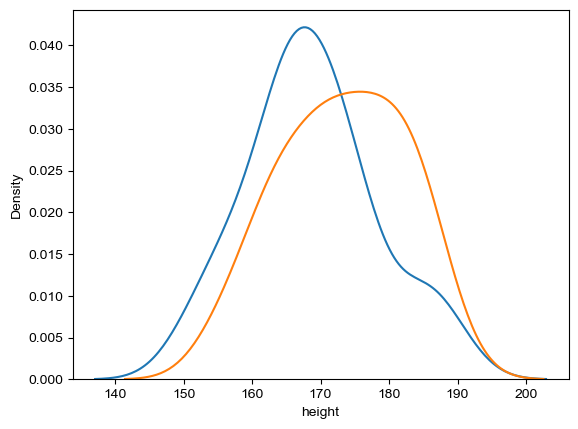

In [37]:
sns.kdeplot(region_a_height2)
sns.kdeplot(region_b_height2)
plt.xlabel('height')
plt.show()

In [42]:
# 计算z值和p值（双尾）
z_stat, p_value = ztest(region_a_height2, region_b_height2, alternative='two-sided')
print(z_stat, p_value)

# 显著水平为0.05（显著水平一般用alpha字母表示）
alpha = 0.05


# 比较计算出的p值和显著水平，打印是否有显著差异的结论
if p_value < alpha:
    print('两组有显著差异')
else:
    print('两组无显著差异')



-1.9906963757270788 0.04651427741343415
两组有显著差异


In [44]:
# 计算z值和p值（单尾正差异）
z_stat, p_value = ztest(region_a_height2, region_b_height2, alternative='larger')
print(z_stat, p_value)

# 显著水平为0.025（显著水平一般用alpha字母表示）
alpha = 0.025


# 比较计算出的p值和显著水平，打印是否有显著差异的结论
if p_value > alpha:
    print('a地区的身高显著大于b地区')
else:
    print('a地区的身高显著小于b地区')

-1.9906963757270788 0.9767428612932829
a地区的身高显著大于b地区


In [46]:
# 计算z值和p值（单尾负差异）
z_stat, p_value = ztest(region_a_height2, region_b_height2, alternative='smaller')
print(z_stat, p_value)


# 显著水平为0.025（显著水平一般用alpha字母表示）
alpha = 0.025

# 比较计算出的p值和显著水平，打印是否有显著差异的结论
if p_value < alpha:
        print('a地区的身高显著大于b地区')
else:
    print('a地区的身高显著小与b地区')



-1.9906963757270788 0.023257138706717074
a地区的身高显著大于b地区
